<header style="padding:1px;background:#f9f9f9;border-top:3px solid #00b2b1"><img id="Teradata-logo" src="https://www.teradata.com/Teradata/Images/Rebrand/Teradata_logo-two_color.png" alt="Teradata" width="220" align="right" />

<b style = 'font-size:28px;font-family:Arial;color:#E37C4D'>Data Cleaning, Data Analysis and Processing</b>
</header>

### Disclaimer
TERADATA DISCLAIMS ALL WARRANTIES RELATING TO THE CODE, EXPRESS OR IMPLIED, INCLUDING, BUT NOT LIMITED TO, ANY WARRANTIES AGAINST INFRINGEMENT OF THIRD-PARTY RIGHTS, MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE.

TERADATA SHALL NOT BE RESPONSIBLE OR LIABLE WITH RESPECT TO ANY SUBJECT MATTER OF THE CODE UNDER ANY CONTRACT, NEGLIGENCE, STRICT LIABILITY OR OTHER THEORY 
    (A) FOR LOSS OR INACCURACY OF DATA OR COST OF PROCUREMENT OF SUBSTITUTE GOODS, SERVICES OR TECHNOLOGY, OR 
    (B) FOR ANY INDIRECT, INCIDENTAL OR CONSEQUENTIAL DAMAGES INCLUDING, BUT NOT LIMITED TO LOSS OF REVENUES AND LOSS OF PROFITS. TERADATA SHALL NOT BE RESPONSIBLE FOR ANY MATTER BEYOND ITS REASONABLE CONTROL.

Notwithstanding anything to the contrary: 
    (a) Teradata will have no obligation of any kind with respect to any Code-related comments, suggestions, design changes or improvements that you elect to provide to Teradata in either verbal or written form (collectively, “Feedback”), and 
    (b) Teradata and its affiliates are hereby free to use any ideas, concepts, know-how or techniques, in whole or in part, contained in Feedback: 
        (i) for any purpose whatsoever, including developing, manufacturing, and/or marketing products and/or services incorporating Feedback in whole or in part, and 
        (ii) without any restrictions or limitations, including requiring the payment of any license fees, royalties, or other consideration. 

## Introduction
##### This notebook shows various dataframe methods that can be used to analyse and cleanse a dataset. 

Workflow steps:
1. Import the required teradataml modules.
2. Connect to a Vantage system.
3. Data Loading and visualize the data using Plot(). 
4. Data Analysis & preparation e.g. use of various dataframe functions to get details about the data like shape, null values etc., use Variable transformation to fill NULL values. 
5. Cleanup.

<hr>
<b style = 'font-size:28px;font-family:Arial;color:#E37C4D'>1. Import the required modules.</b>

In [1]:
# Import.
import os
import getpass

from collections import OrderedDict

from teradataml.context.context import *
from teradataml.dataframe.copy_to import copy_to_sql
from teradataml.dataframe.dataframe import DataFrame
from teradataml import read_csv, FillNa, valib
from teradataml.options.configure import configure
from teradataml import db_drop_table, fastload, OneHotEncodingFit, OneHotEncodingTransform, ScaleFit, ScaleTransform
from teradatasqlalchemy import (INTEGER, FLOAT, VARCHAR)

<hr>
<b style = 'font-size:28px;font-family:Arial;color:#E37C4D'>2. Connect to Vantage</b>
<p style = 'font-size:16px;font-family:Arial'>You will be prompted to enter the host name, username and password.</p>

In [2]:
con = create_context(host=getpass.getpass("Hostname: "), 
                     username=getpass.getpass("Username: "),
                     password=getpass.getpass("Password: "))

Hostname:  ········
Username:  ········
Password:  ········


<hr>
<b style = 'font-size:28px;font-family:Arial;color:#E37C4D'>3. Data Loading</b>

##### Data Source: https://www.kaggle.com/code/hamelg/python-for-data-14-data-exploration-and-cleaning/input?select=train.csv

In [3]:
# Load data using read_csv(). 
types = OrderedDict(PassengerId=INTEGER, Survived=INTEGER, Pclass=INTEGER, Name=VARCHAR, 
                    Sex=VARCHAR, Age=FLOAT, SibSp=INTEGER, Parch=INTEGER, Ticket=VARCHAR, 
                    Fare=FLOAT, Cabin=VARCHAR, Embarked=VARCHAR)
read_csv(filepath = getpass.getpass("filepath: "), table_name = "titanic_train", types = types, primary_index = 'PassengerId')

filepath:  ········


PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
530,0,2,"Hocking, Mr. Richard George",male,23.0,2,1,29104,11.5,None,S
591,0,3,"Rintamaki, Mr. Matti",male,35.0,0,0,STON/O 2. 3101273,7.125,None,S
387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9,None,S
856,1,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.35,None,S
244,0,3,"Maenpaa, Mr. Matti Alexanteri",male,22.0,0,0,STON/O 2. 3101275,7.125,None,S
713,1,1,"Taylor, Mr. Elmer Zebley",male,48.0,1,0,19996,52.0,C126,S
448,1,1,"Seward, Mr. Frederic Kimber",male,34.0,0,0,113794,26.55,None,S
122,0,3,"Moore, Mr. Leonard Charles",male,None,0,0,A4. 54510,8.05,None,S
734,0,2,"Berriman, Mr. William John",male,23.0,0,0,28425,13.0,None,S
265,0,3,"Henry, Miss. Delia",female,None,0,0,382649,7.75,None,Q


In [4]:
# Create teradataml dataframe.
titanic_train = DataFrame.from_table("titanic_train")

In [5]:
# Print dataframe shape. 
titanic_train.shape    

(891, 12)

In [6]:
# Plot a bar graph between 'Pclass' and 'Fare'. 'Fare' for Pclass = 1 is highest. 
p = titanic_train.plot(x=titanic_train.Pclass, y=titanic_train.Fare, kind="bar", title="Bar graph of Fare v/s Pclass", linewidth=10, style="red")

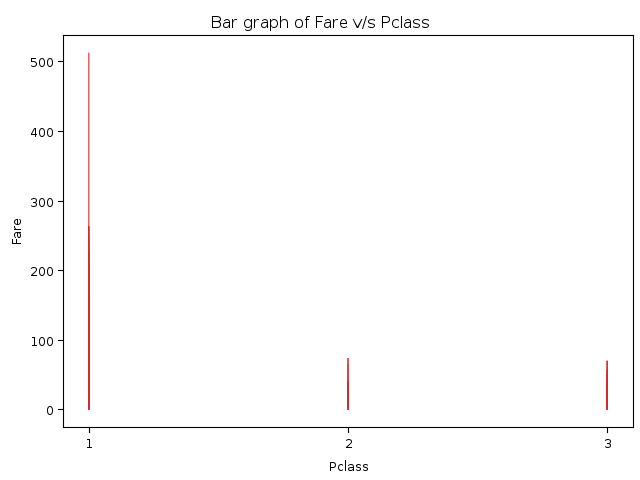

In [7]:
p.show()

<hr>
<b style = 'font-size:28px;font-family:Arial;color:#E37C4D'>4. Data Analysis & preparation</b>

In [8]:
# Display top 5 rows. 
titanic_train.head(5)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,None,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,None,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,None,S


In [9]:
# Generate regular aggregates.
titanic_train.describe()

func,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
min,1,0,1,0.42,0,0,0
std,257.354,0.487,0.836,14.526,1.103,0.806,49.693
25%,223.5,0,2,20.125,0,0,7.91
50%,446,0,3,28,0,0,14.454
75%,668.5,1,3,38,1,0,31
max,891,1,3,80,8,6,512.329
mean,446,0.384,2.309,29.699,0.523,0.382,32.204
count,891,891,891,714,891,891,891


In [10]:
# describe() with "include='all'" will give the total count and unique count of "Name" column. 
titanic_train.select(["Name"]).describe(include='all')

func,Name
mean,None
mean,None
mean,None
count,891
mean,None
mean,None
mean,None
mean,None
unique,891
mean,None


In [11]:
# describe() with "include='all'" will give the total count and unique count of "Ticket" column. 
titanic_train.select(["Ticket"]).describe(include='all')

func,Ticket
mean,None
mean,None
mean,None
count,891
mean,None
mean,None
mean,None
mean,None
unique,681
mean,None


##### Ticket has 681 unique values: almost as many as there are passengers. Categorical variables with almost as many levels as there are records are often not very useful for prediction. The ticket numbers do not have any logical pattern so it is hard to group them. We can drop the column. 

In [12]:
# Drop the column.
titanic_train.drop(["Ticket"], axis=1)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
326,1,1,"Young, Miss. Marie Grice",female,36.0,0,0,135.6333,C32,C
183,0,3,"Asplund, Master. Clarence Gustaf Hugo",male,9.0,4,2,31.3875,None,S
652,1,2,"Doling, Miss. Elsie",female,18.0,0,1,23.0,None,S
40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,11.2417,None,C
774,0,3,"Elias, Mr. Dibo",male,None,0,0,7.225,None,C
366,0,3,"Adahl, Mr. Mauritz Nils Martin",male,30.0,0,0,7.25,None,S
509,0,3,"Olsen, Mr. Henry Margido",male,28.0,0,0,22.525,None,S
795,0,3,"Dantcheff, Mr. Ristiu",male,25.0,0,0,7.8958,None,S
61,0,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,7.2292,None,C
469,0,3,"Scanlan, Mr. James",male,None,0,0,7.725,None,Q


In [13]:
# Lets analyze the "Cabin" variable. It is not a numeric variable hence, the aggregates like mean are not applicable. 
# Only values of interest are 'unique' and 'count'.
titanic_train.select(["Cabin"]).describe(include='all')

func,Cabin
mean,None
mean,None
mean,None
count,204
mean,None
mean,None
mean,None
mean,None
unique,147
mean,None


In [14]:
# Sort by "Name" column. 
titanic_train.sort("Name")

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
846,0,3,"Abbing, Mr. Anthony",male,42.0,0,0,C.A. 5547,7.55,None,S
747,0,3,"Abbott, Mr. Rossmore Edward",male,16.0,1,1,C.A. 2673,20.25,None,S
280,1,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1,C.A. 2673,20.25,None,S
309,0,2,"Abelson, Mr. Samuel",male,30.0,1,0,P/PP 3381,24.0,None,C
875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0,None,C
366,0,3,"Adahl, Mr. Mauritz Nils Martin",male,30.0,0,0,C 7076,7.25,None,S
402,0,3,"Adams, Mr. John",male,26.0,0,0,341826,8.05,None,S
41,0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.0,1,0,7546,9.475,None,S
856,1,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.35,None,S
208,1,3,"Albimona, Mr. Nassef Cassem",male,26.0,0,0,2699,18.7875,None,C


##### Some of the variables may be encoded as data types that don't fit well with what the data really is or what it means.

For example, Sex column - we transform it to numerical as shown below.


In [15]:
# The OneHotEncodingFit() function outputs a DataFrame of attributes and categorical values to input to 
# OneHotEncodingTransform() function, which encodes them as one-hot numeric vectors.
fit_obj1 = OneHotEncodingFit(data=titanic_train, 
                             is_input_dense=True, 
                             approach="LIST", 
                             categorical_values=['male', 'female'], 
                             target_column=["Sex"], 
                             ordinal_values=[1, 2],
                             default_value=-1, 
                             start_value=0
                             )

In [16]:
# OneHotEncodingTransform() function encodes specified attributes and categorical values as one-hot numeric vectors, 
# using OneHotEncodingFit() function function output.
obj = OneHotEncodingTransform(data=titanic_train, 
                              object=fit_obj1.result, 
                              is_input_dense=True)

In [17]:
# Print the result dataframe. 
obj.result

PassengerId,Survived,Pclass,Name,Sex_male,Sex_female,Sex_other,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
530,0,2,"Hocking, Mr. Richard George",1,0,0,23.0,2,1,29104,11.5,None,S
591,0,3,"Rintamaki, Mr. Matti",1,0,0,35.0,0,0,STON/O 2. 3101273,7.125,None,S
387,0,3,"Goodwin, Master. Sidney Leonard",1,0,0,1.0,5,2,CA 2144,46.9,None,S
469,0,3,"Scanlan, Mr. James",1,0,0,None,0,0,36209,7.725,None,Q
326,1,1,"Young, Miss. Marie Grice",0,1,0,36.0,0,0,PC 17760,135.6333,C32,C
795,0,3,"Dantcheff, Mr. Ristiu",1,0,0,25.0,0,0,349203,7.8958,None,S
183,0,3,"Asplund, Master. Clarence Gustaf Hugo",1,0,0,9.0,4,2,347077,31.3875,None,S
652,1,2,"Doling, Miss. Elsie",0,1,0,18.0,0,1,231919,23.0,None,S
61,0,3,"Sirayanian, Mr. Orsen",1,0,0,22.0,0,0,2669,7.2292,None,C
122,0,3,"Moore, Mr. Leonard Charles",1,0,0,None,0,0,A4. 54510,8.05,None,S


In [18]:
# Notice the count of age is less than the total row count of the data set(891). This indicates missing data.
titanic_train.select(["Age"]).describe()

func,Age
min,0.42
std,14.526
25%,20.125
50%,28
75%,38
max,80
mean,29.699
count,714


In [19]:
# Find the rows with null value in "Age" column.
df_age_null = titanic_train[titanic_train.Age.isnull() == True]
df_age_null

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
202,0,3,"Sage, Mr. Frederick",male,None,8,2,CA. 2343,69.55,None,S
528,0,1,"Farthing, Mr. John",male,None,0,0,PC 17483,221.7792,C95,S
793,0,3,"Sage, Miss. Stella Anna",female,None,8,2,CA. 2343,69.55,None,S
265,0,3,"Henry, Miss. Delia",female,None,0,0,382649,7.75,None,Q
305,0,3,"Williams, Mr. Howard Hugh ""Harry""",male,None,0,0,A/5 2466,8.05,None,S
141,0,3,"Boulos, Mrs. Joseph (Sultana)",female,None,0,2,2678,15.2458,None,C
160,0,3,"Sage, Master. Thomas Henry",male,None,8,2,CA. 2343,69.55,None,S
465,0,3,"Maisner, Mr. Simon",male,None,0,0,A/S 2816,8.05,None,S
122,0,3,"Moore, Mr. Leonard Charles",male,None,0,0,A4. 54510,8.05,None,S
467,0,2,"Campbell, Mr. William",male,None,0,0,239853,0.0,None,S


In [20]:
# Set install location.
configure.val_install_location = "val"

In [21]:
# Fill missing values in column 'Age' with median.
fillna_median = FillNa(style="median",columns=["Age"], out_columns=["Age2"])

In [22]:
# To run any transformation, user needs to use Transform() function from Vantage Analytic Library.
obj = valib.Transform(data=titanic_train, fillna=fillna_median, key_columns="PassengerId")

In [23]:
obj.result

passengerid,Age2
530,23.0
591,35.0
387,1.0
856,18.0
244,22.0
713,48.0
448,34.0
122,28.0
734,23.0
265,28.0


In [24]:
# No missing values.
obj.result.select(["Age2"]).describe()

func,Age2
min,0.42
std,13.02
25%,22
50%,28
75%,35
max,80
mean,29.362
count,891


In [25]:
# Check whether Age2 column has any null values. The result shows that there aren't any null values. 
obj.result[obj.result.Age2.isnull() == True]

passengerid,Age2


In [26]:
# ScaleFit() function outputs statistics to input to ScaleTransform() function, which scales specified input DataFrame columns.
# Lets try to scale "Fare" with respect to sum value of the column.
scale_fit_obj = ScaleFit(data=titanic_train, target_columns="Fare", 
                        scale_method="SUM", 
                        miss_value="KEEP", 
                        global_scale=False, 
                        multiplier="1", 
                        intercept="0")

In [27]:
# Print the result DataFrame.
print(scale_fit_obj.output)
print(scale_fit_obj.output_data)

                                                                                                   Fare
TD_STATTYPE_SCLFIT                                                                                     
intercept                                                                                        0.0000
scale                                                                                        28693.9493
count                                                                                          891.0000
globalscale_false                                                                                   NaN
max                                                                                            512.3292
null                                                                                             0.0000
ScaleMethodNumberMapping: [0:mean,1:sum,2:ustd,3:std,4:range,5:midrange,6:maxabs,7:rescale]      1.0000
multiplier                                                      

In [28]:
# ScaleTransform() function scales specified columns in input data, using ScaleFit() function output.
scale_transform_obj = ScaleTransform(data=titanic_train, 
                                     object=scale_fit_obj.output, 
                                     accumulate=["PassengerId", "Cabin"])

In [29]:
# Print the result DataFrame.
print(scale_transform_obj.result)

   PassengerId Cabin      Fare
0          530  None  0.000401
1          591  None  0.000248
2          387  None  0.001634
3          469  None  0.000269
4          326   C32  0.004727
5          795  None  0.000275
6          183  None  0.001094
7          652  None  0.000802
8           61  None  0.000252
9          122  None  0.000281


<hr>
<b style = 'font-size:28px;font-family:Arial;color:#E37C4D'>5. Cleanup</b>

In [30]:
# Drop the table. 
db_drop_table(table_name='titanic_train')

True

In [31]:
# Remove context.
remove_context()

True